# <span style="color:red">Task 1 - Prediction using Supervised ML</span>

## <span style="color:blue">Graduate Rotational Internship Program (GRIP) The Spark Foundation</span>

## <span style="color:Green">Data Science and Business Analytics Internship</span> (#GRIPMAY21)

### <i>Author: Margiv S. Amin<i>
    
#### The purpose is to predict the percentage of student scores based on the study hours.

In [1]:
# importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Step 1: Reading the Data
We will read the data using the pandas library.

In [2]:
# importing the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(f"Shape of the dataframe is {df.shape}")
df.head()

Shape of the dataframe is (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 2: Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
x = df['Hours'].values
y = df['Scores'].values

In [6]:
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Step 3: Visualising the Data

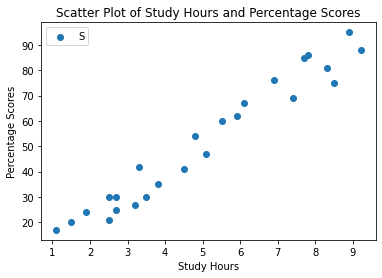

In [8]:
plt.scatter(x=df["Hours"], y=df["Scores"])
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scores")
plt.title("Scatter Plot of Study Hours and Percentage Scores")
plt.legend("S")

#### The scatter plot show the positive linear relation (linearly dependent) between students' study hours and percentages scores.

Text(0.5, 1.0, 'Distribution of Study Hours')

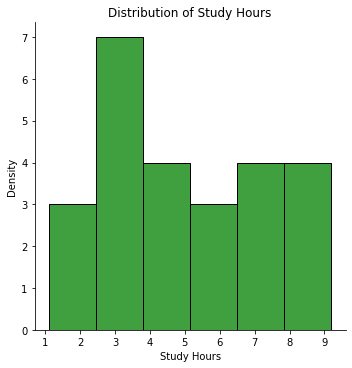

In [9]:
sns.displot(df["Hours"], color="green") 
plt.xlabel("Study Hours")
plt.ylabel("Density")
plt.title("Distribution of Study Hours")

Text(0.5, 1.0, 'Distribution of Percentage Scores')

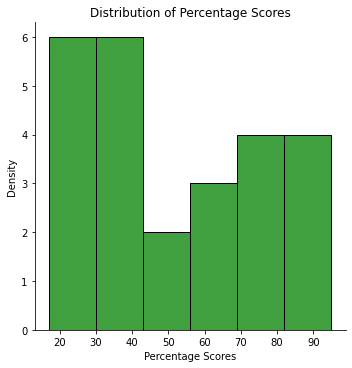

In [10]:
sns.displot(df["Scores"], color="green")
plt.xlabel("Percentage Scores")
plt.ylabel("Density")
plt.title("Distribution of Percentage Scores")

### Step 3: Preparing the Data
In this step we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now, as we have our attributes and labels, our next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Step 4: Training the Data and plotting the regression line
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
print("Accuracy on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Accuracy on training set: 0.952
Accuracy on test set: 0.945


In [15]:
print ("Coefficient :", regressor.coef_)
print ("Intercept :", regressor.intercept_)

Coefficient : [9.91065648]
Intercept : 2.0181600414346974


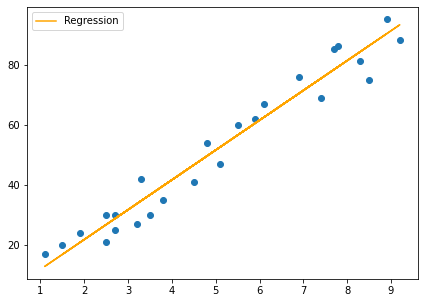

In [16]:
#Visualize the data with regression line
line = regressor.coef_*X+regressor.intercept_
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.scatter(X,y)
plt.plot(X, line, color="orange", label="Regression")
plt.legend()

### Step 5: Making Predictions and evaluating our model
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#mean square error
mean_squared_error(y_pred, y_test)

21.598769307217406

In [20]:
#R-squared
r2_score(y_test, y_pred)

0.9454906892105355

**R-quared showed 0.9454 which means the approximately <i>94.54%<i> of the observed variation can be explained by the model's input.**

In [21]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


## Thank You!